## COVID-19 Analysis

### data source

https://github.com/CSSEGISandData/COVID-19


In [365]:
# data files
data_file = "https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Deaths.csv"

In [366]:
import pandas as pd
import numpy as np

df = pd.read_csv(data_file)
df

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,3/12/20,3/13/20,3/14/20,3/15/20,3/16/20,3/17/20,3/18/20,3/19/20,3/20/20,3/21/20
0,NaN,Thailand,15.0000,101.0000,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1
1,NaN,Japan,36.0000,138.0000,0,0,0,0,0,0,...,16,19,22,22,27,29,29,29,33,35
2,NaN,Singapore,1.2833,103.8333,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
3,NaN,Nepal,28.1667,84.2500,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,NaN,Malaysia,2.5000,112.5000,0,0,0,0,0,0,...,0,0,0,0,0,2,2,2,3,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
477,Northwest Territories,Canada,64.8255,-124.8457,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
478,NaN,Cape Verde,15.1111,-23.6167,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
479,NaN,East Timor,-8.5500,125.5600,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
480,NaN,Eritrea,15.1794,39.7823,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [367]:
# aggregate on country
agg_cols = {}
for col in df.columns[4:]:
    agg_cols[col] = {'sum'}
dfg = df.groupby("Country/Region").agg(agg_cols)
dfg.columns = df.columns[4:]
dfg.reset_index()
dfg.head()

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,3/12/20,3/13/20,3/14/20,3/15/20,3/16/20,3/17/20,3/18/20,3/19/20,3/20/20,3/21/20
Country/Region,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Albania,0,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,2,2,2,2
Algeria,0,0,0,0,0,0,0,0,0,0,...,1,2,3,4,4,4,7,9,11,15
Andorra,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Angola,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


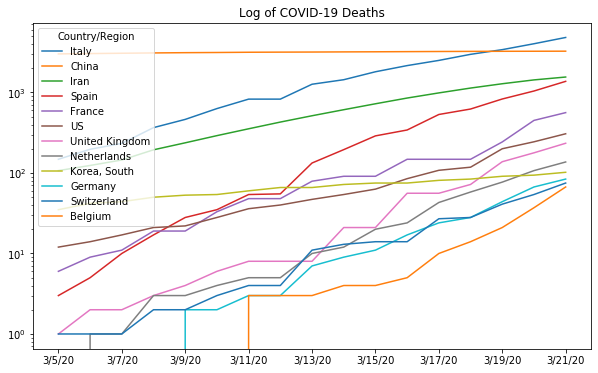

In [368]:
from matplotlib.pyplot import *

# latest leaders
last_cols = dfg.columns[-17:]
last_df = dfg[last_cols].sort_values(by=[last_cols[-1:][0]], ascending=False).transpose()
last_df = last_df[last_df.columns[:12]]
last_df.plot(figsize=(10,6), logy=True, title='Log of COVID-19 Deaths')


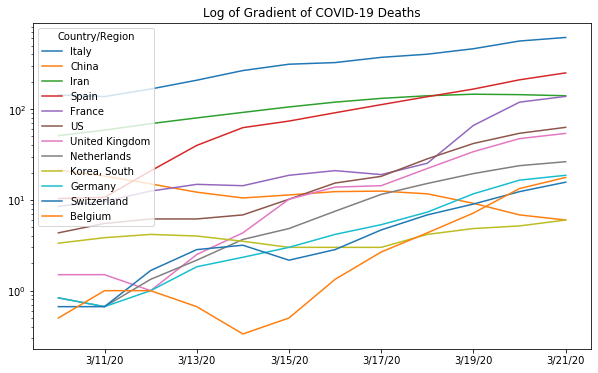

In [369]:
# plot log of gradient
grad_df = last_df.tail(-2).rolling(3).mean().apply(np.gradient)
grad_df.plot(figsize=(10,6), logy=True, title='Log of Gradient of COVID-19 Deaths')
